In [1476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set the random seed for reproducibility
np.random.seed(1)

# Define the number of rows and columns
num_rows = 15

num_columns = 2

# Create a DataFrame with random data
random_data = pd.DataFrame(np.random.rand(num_rows, num_columns), 
                            columns=[f'Column_{i+1}' for i in range(num_columns)])

print(random_data)

rd = random_data

rd['Column_1'] = (rd['Column_1'] + rd.index)
rd['Column_2'] = (rd['Column_2'] + rd.index)

print(rd)

    Column_1  Column_2
0   0.417022  0.720324
1   0.000114  0.302333
2   0.146756  0.092339
3   0.186260  0.345561
4   0.396767  0.538817
5   0.419195  0.685220
6   0.204452  0.878117
7   0.027388  0.670468
8   0.417305  0.558690
9   0.140387  0.198101
10  0.800745  0.968262
11  0.313424  0.692323
12  0.876389  0.894607
13  0.085044  0.039055
14  0.169830  0.878143
     Column_1   Column_2
0    0.417022   0.720324
1    1.000114   1.302333
2    2.146756   2.092339
3    3.186260   3.345561
4    4.396767   4.538817
5    5.419195   5.685220
6    6.204452   6.878117
7    7.027388   7.670468
8    8.417305   8.558690
9    9.140387   9.198101
10  10.800745  10.968262
11  11.313424  11.692323
12  12.876389  12.894607
13  13.085044  13.039055
14  14.169830  14.878143


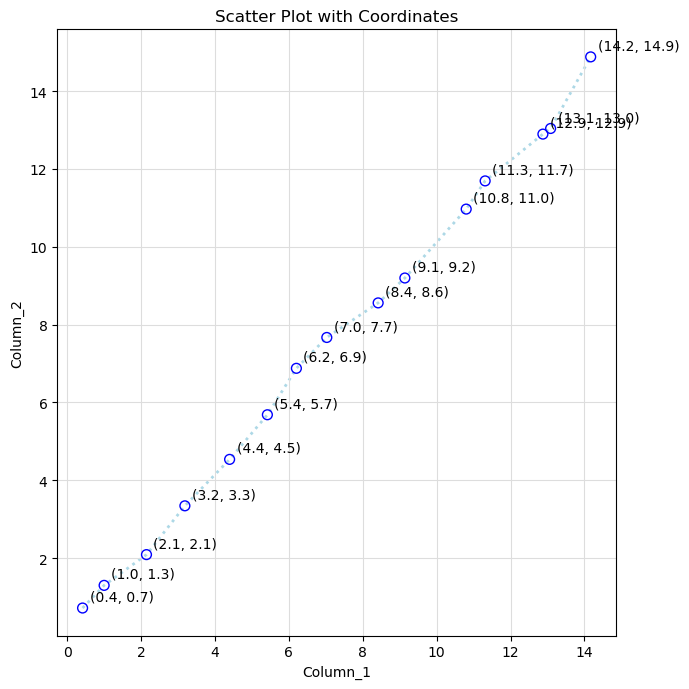

In [1477]:
def create_Original_Graph(dataset):

    Color = 'blue'
    lineColor = "lightblue"
    plt.figure(figsize=(7, 7))
    
    plt.plot(dataset['Column_1'], dataset['Column_2'], color=lineColor, linestyle=':', linewidth=2, label='Trend Line', zorder=1)
    
    plt.scatter(dataset['Column_1'], dataset['Column_2'], s=50, zorder=3, facecolors='none', edgecolors=Color)
    # Annotate each point with its coordinates
    for x, y in zip(dataset['Column_1'], dataset['Column_2']):
        plt.annotate(f'({x:.1f}, {y:.1f})', 
                     (x, y),
                     xytext=(5, 5),
                     textcoords='offset points')
    
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle='-', linewidth=0.5)
    
    plt.xlabel('Column_1')
    plt.ylabel('Column_2')
    plt.title('Scatter Plot with Coordinates')
    plt.tight_layout()

create_Original_Graph(rd)
plt.show()

In [1478]:
def find_Sample_Means(samples, dataset):
    n = samples
    
    x_Sample_Sum = 0
    y_Sample_Sum = 0
    
    for row in range(n):
        y_Sample_Sum += dataset['Column_2'][row]
        x_Sample_Sum += dataset['Column_1'][row]
    
    y_Sample_Mean = y_Sample_Sum / n
    x_Sample_Mean = x_Sample_Sum / n
    
    return x_Sample_Mean, y_Sample_Mean

sample_Means = find_Sample_Means(num_rows, rd)
x_Sample_Mean, y_Sample_Mean = sample_Means
print(f"X samples Mean: {x_Sample_Mean} \nY samples Mean: {y_Sample_Mean}")

X samples Mean: 7.306738572287043 
Y samples Mean: 7.564157135196053


In [1479]:
def find_slope(x_mean, y_mean, samples, dataset):
    n = samples
    covariance = 0
    variance = 0

    for row in range(n):
        
        xi = dataset['Column_1'][row]
        yi = dataset['Column_2'][row]
        
        covariance += (xi - x_mean) * (yi - y_mean)
        
        variance += (xi - x_mean) ** 2

    B1 = covariance / variance

    return B1

B1 = find_slope(x_Sample_Mean, y_Sample_Mean, num_rows, rd)

print(f"'B1', or the Slope: {B1}")

'B1', or the Slope: 1.002960632877842


In [1480]:
def find_intercept(x_mean, y_mean, slope):
    
    B0 = y_mean - (slope * x_mean)

    return B0

B0 = find_intercept(x_Sample_Mean, y_Sample_Mean, B1)

print(f"'B0', or the Y-Intercept: {B0}")

'B0', or the Y-Intercept: 0.23578599246210086


In [1481]:
def find_Residual_Sum_of_Squares(intercept, slope, samples, dataset):
    
    RSS = 0
    squared_errors = []
    
    for row in range(samples):
        
        xi = dataset['Column_1'][row]
        yi = dataset['Column_2'][row]
        
        squared_error = (yi - (intercept+(slope*xi))) ** 2

        RSS += squared_error
        squared_errors.append(squared_error)
        MSE = RSS / samples
    return RSS, MSE, squared_errors

RSS_Result = find_Residual_Sum_of_Squares(B0, B1, num_rows, rd)
RSS, MSE, squared_errors = RSS_Result

print(f"Residiual Sum of Squares: {RSS} \n\nMSE: {MSE} \n\nList of Squared Errors: {squared_errors}")

Residiual Sum of Squares: 0.872595678816883 

MSE: 0.05817304525445887 

List of Squared Errors: [0.004393283270839388, 0.004028597526785079, 0.08794726692307475, 0.007382044237791115, 0.01139640520645154, 0.00020149087307169596, 0.17598871467023586, 0.14937329088238033, 0.01423762411471638, 0.042079454172633216, 0.01004926550693522, 0.012016007150742443, 0.06537775571146039, 0.10273014259835164, 0.185394335971414]


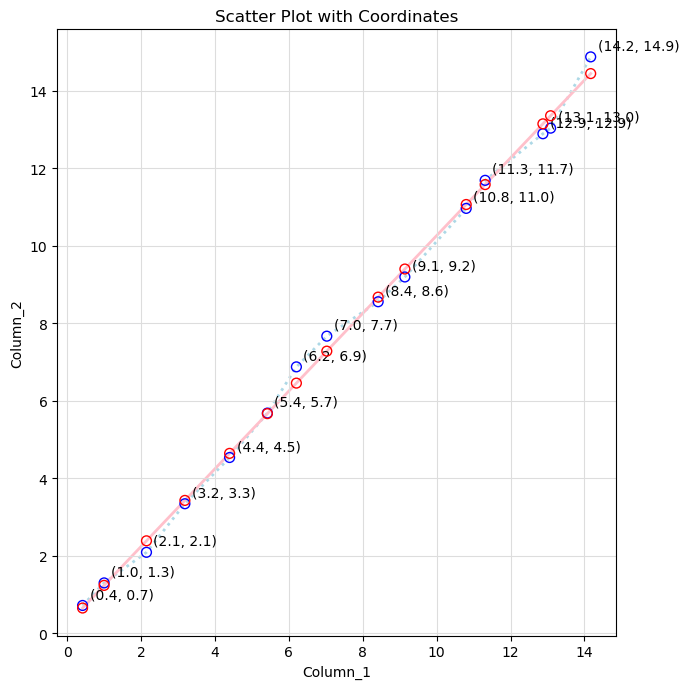

In [1482]:
create_Original_Graph(rd)

LR_Color = 'red'
LR_lineColor = 'pink'

def create_Linear_Regression_Lines(intercept, slope, dataset):
    x_Linear_Regression = dataset['Column_1']
    y_Linear_Regression = intercept + (slope * x_Linear_Regression)
    plt.plot(x_Linear_Regression, y_Linear_Regression, color=LR_lineColor, linestyle='-', linewidth=2, label='Trend Line', zorder=1)
    plt.scatter(x_Linear_Regression, y_Linear_Regression, s=50, zorder=3, facecolors='none', edgecolors=LR_Color, label='Regression Line')
    return x_Linear_Regression, y_Linear_Regression

x_Linear_Regression, y_Linear_Regression = create_Linear_Regression_Lines(B0, B1, rd)


plt.show()

In [1483]:
def predict_Next_Point(intercept, slope, samples, columns, dataset):
    
    new_num_rows = samples + 1

    # Creating a new data frame with the same seed
    new_rd = pd.DataFrame(np.random.rand(new_num_rows, columns), 
                            columns=[f'Column_{i+1}' for i in range(columns)])

    new_rd['Column_1'] = (new_rd['Column_1'] + new_rd.index)
    new_rd['Column_2'] = (new_rd['Column_2'] + new_rd.index)

    
    true_Y = round(new_rd.at[len(new_rd) - 1, 'Column_2'], 4)

    test_X = round(new_rd.at[len(new_rd) - 1, 'Column_1'], 4)
    
    test_Y = round(intercept + slope * test_X, 4)

    residual = round(true_Y - test_Y, 4)
    
    return test_Y, true_Y, test_X, residual


    
test_Y, true_Y, test_X, residual = predict_Next_Point(B0, B1, num_rows, num_columns, rd)
print(f"At X = {test_X}, the True Y-Value is: {true_Y} \n\nAt X = {test_X}, the Predicted Y-Value is: {test_Y} \n\nAt X = {test_X} the Residual is {residual}")

At X = 15.1023, the True Y-Value is: 15.4141 

At X = 15.1023, the Predicted Y-Value is: 15.3828 

At X = 15.1023 the Residual is 0.0313


In [1484]:
def find_Sample_SD(x_mean, samples, dataset):
    temp = 0
    for row in range(samples):
        xi = row
        temp += (xi - x_mean) ** 2
    standard_deviation = np.sqrt(temp / (samples-1))
    return standard_deviation
s_Standard_Deviation = find_Sample_SD(x_Sample_Mean, num_rows, rd)
print(f"The samples Standard Deviation is: {round(s_Standard_Deviation, 4)}")

The samples Standard Deviation is: 4.4834


In [1485]:
def find_Sample_SE(sd, samples):
    standard_error = (sd ** 2) / samples
    return standard_error
s_Standard_Error = find_Sample_SE(s_Standard_Deviation, num_rows)
print(f"The Standard Error is: {round(s_Standard_Error, 4)}")

The Standard Error is: 1.3401


In [1486]:
def find_RSE(samples):
    RSE = np.sqrt(RSS / (samples-2))
    return RSE
RSE = find_RSE(num_rows)
print(f"The Residual Standard Error is: {round(RSE, 4)}")

The Residual Standard Error is: 0.2591


In [1487]:
def find_SE_of_Slope_and_Intercept(x_mean, samples, dataset):
    SE_B0_Sq = 0
    SE_B1_Sq = 0
    
    temp1 = 0
    for row in range(samples):
        temp1 += (dataset['Column_1'][row] - x_mean) ** 2

    temp2 = (1 / samples) + (x_mean / temp1)
    
    SE_B0_Sq = RSE * temp2
    SE_B1_Sq = RSE / temp1

    return SE_B0_Sq, SE_B1_Sq

SE_B0_Sq, SE_B1_Sq = find_SE_of_Slope_and_Intercept(x_Sample_Mean, num_rows, rd)

print(f"The Standard Error of B0 Squared is: {round(SE_B0_Sq, 4)}\nThe Standard error of B1 Squared is: {round(SE_B1_Sq, 4)}")

The Standard Error of B0 Squared is: 0.0238
The Standard error of B1 Squared is: 0.0009


In [1488]:
def find_Confidence_Intervals(intercept, slope, SE_intercept, SE_slope):
    CI_95_B0 = []
    CI_95_B1 = []

    lower_Limit = -2
    upper_Limit = 2

    CI_95_B0.append(round(intercept + (lower_Limit * SE_intercept), 4))
    CI_95_B0.append(round(intercept + (upper_Limit * SE_intercept), 4))
    CI_95_B1.append(round(slope + (lower_Limit * SE_slope), 4))
    CI_95_B1.append(round(slope + (upper_Limit * SE_slope), 4))

    confidence_Intervals = [CI_95_B0, CI_95_B1]
    return confidence_Intervals
confidence_Intervals = find_Confidence_Intervals(B0, B1, SE_B0_Sq, SE_B1_Sq)
print(confidence_Intervals)
print(f"\nAt a 95% Confidence Interval, the Y-Intercept lies in the range: {confidence_Intervals[0]}")
print(f"\nAt a 95% Confidence Interval, the Slope lies in the range: {confidence_Intervals[1]}")

[[0.1881, 0.2835], [1.0012, 1.0048]]

At a 95% Confidence Interval, the Y-Intercept lies in the range: [0.1881, 0.2835]

At a 95% Confidence Interval, the Slope lies in the range: [1.0012, 1.0048]


In [1489]:
def find_t_Stat(slope, SE_slope):
    t_stat = slope / SE_slope
    return t_stat

t_stat = round(find_t_Stat(B1, SE_B1_Sq), 4)
print(f"The t-statistic is {t_stat}")

The t-statistic is 1116.9986


In [1490]:
def find_Total_Sum_of_Squares(y_mean, samples, dataset):
    TSS = 0
    for row in range(samples):
        TSS += (dataset['Column_2'][row] - y_mean) ** 2
    return TSS
TSS = round(find_Total_Sum_of_Squares(y_Sample_Mean, num_rows, rd), 4)
print(f"The Total Sum of Squares is {TSS}")

def find_R_Squared(tss, rss):
    R2 = (tss - rss) / tss
    return R2
R2 = round(find_R_Squared(TSS, RSS), 4)
print(f"The R-Squared Value is {R2}")

The Total Sum of Squares is 291.122
The R-Squared Value is 0.997


In [1491]:
def calculate_p_value(t_statistic, df, two_tailed=True):
    if two_tailed:
        p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))
    else:
        p_value = 1 - stats.t.cdf(t_statistic, df)
    return p_value
    
df = num_rows-2
p_value = calculate_p_value(t_stat, df)
print(f"P-value: {p_value}")

P-value: 0.0
